# MNIST dataset trained with SCIKIT-LEARN SVM classifier, with simple accuracy method.
Based on https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

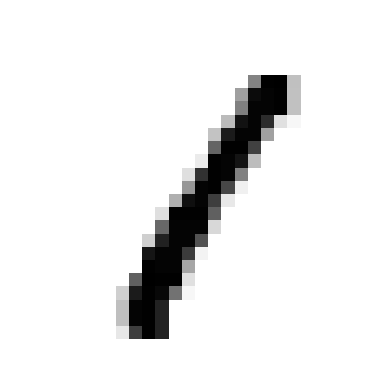

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
X, Y = mnist["data"], mnist["target"].astype(np.uint8)
some_digit = X[3]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()


In [5]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:1000], Y_train[:1000])


SVC()

### Checking predictions

In [7]:
def check_predict( num ):
    if num > 70000:
        return False
    return svm_clf.predict([X[num]]) == Y[ num ]


In [8]:
errors = 0
for i in range( 0, 70000 ):
    if check_predict( i ) == False:
        errors += 1
print( "Errors:", errors, "rate:", (errors/70000) * 100, "%" )

Errors: 6540 rate: 9.342857142857143 %


### Checking accuracy

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X_train, Y_train, cv=3, scoring="accuracy")